### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X_train.shape

(60000, 784)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

#### Extract Test data

In [7]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

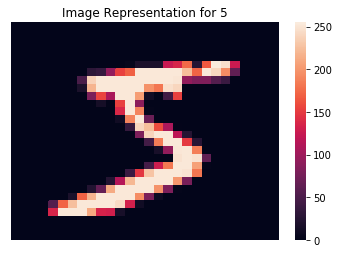

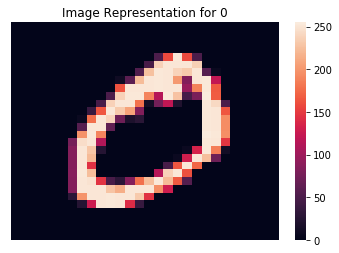

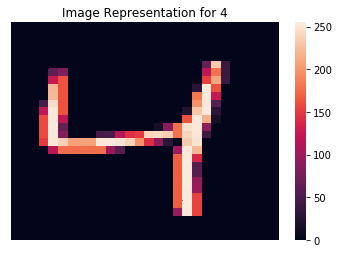

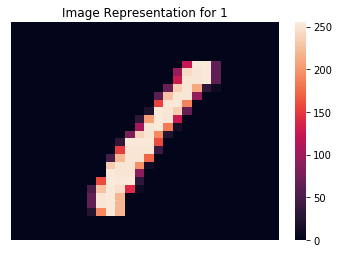

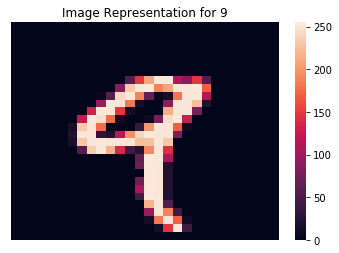

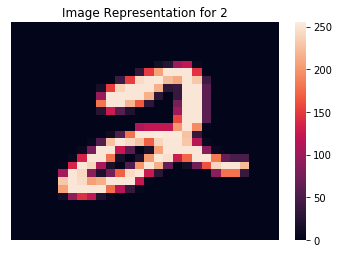

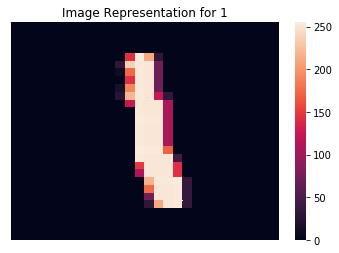

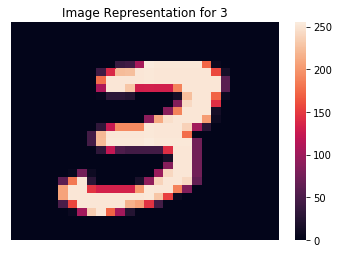

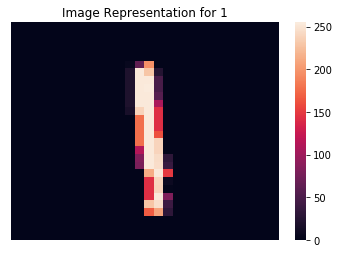

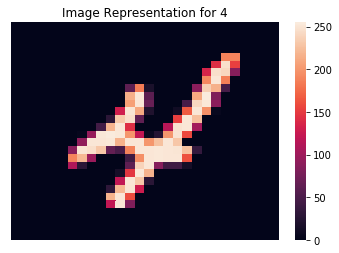

In [41]:
for i in range(10):
    display(X_train[i],y_train[i])

# RBF classifier

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = X_train[0:50000]
y_train = y_train[0:50000]

X_train = scaler.fit_transform(X_train.astype(np.float64))
clf = SVC(max_iter = 700, gamma= 0.005, kernel='rbf')


y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

clf.fit(X_train, y_train)

C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=700, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

##### Calculate Cross Validation Score

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\giris\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


array([ 0.93448917,  0.93646127,  0.9343495 ])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [16]:
y_train_pred

array([3, 0, 2, ..., 8, 4, 8], dtype=uint8)

In [17]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [18]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [19]:
confusionMatrix

array([[4731,    3,  145,    5,    4,   10,   18,    2,   13,    1],
       [   1, 5557,   58,   11,    5,    3,    9,   12,   15,    7],
       [  15,    9, 4808,   30,   19,    3,   15,   24,   38,    7],
       [   2,    6,  258, 4651,    2,   52,    3,   33,   69,   25],
       [   1,    5,  253,    1, 4475,    6,   19,   20,    7,   72],
       [  11,    3,  170,   55,    9, 4172,   37,   10,   22,   17],
       [  12,    5,  312,    0,    8,   33, 4565,    1,   15,    0],
       [   4,   19,  286,    6,   36,    0,    0, 4731,    6,   87],
       [  11,   22,  173,   42,   18,   56,   14,   16, 4475,   15],
       [   8,    4,  201,   24,   43,    9,    1,   87,   21, 4590]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

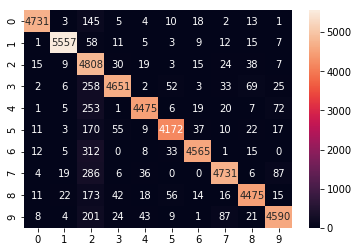

In [20]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [21]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [22]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

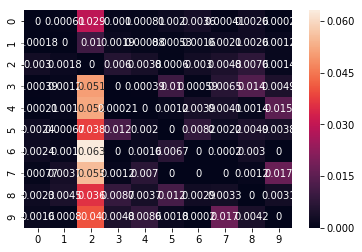

In [23]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [25]:
X_test = scaler.fit_transform(X_test.astype(np.float64))
y_test_pred = clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [26]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 944,    0,   24,    2,    0,    3,    6,    1,    0,    0],
       [   0, 1123,    6,    0,    0,    1,    3,    1,    1,    0],
       [   7,    1,  991,    8,    2,    0,    1,    7,   15,    0],
       [   0,    0,   21,  960,    1,    9,    0,    5,   12,    2],
       [   0,    0,   43,    0,  920,    0,    4,    1,    3,   11],
       [   1,    0,   21,    9,    2,  842,    6,    2,    7,    2],
       [   4,    2,   31,    0,    6,    9,  901,    0,    5,    0],
       [   0,    7,   48,    2,    3,    2,    0,  949,    1,   16],
       [   3,    0,   27,    4,    3,    7,    3,    4,  922,    1],
       [   6,    4,   29,    7,    5,    3,    0,   13,    4,  938]], dtype=int64)

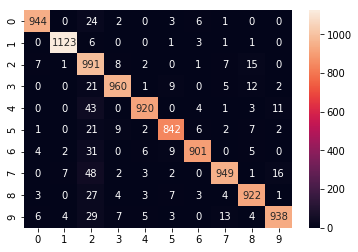

In [27]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [28]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

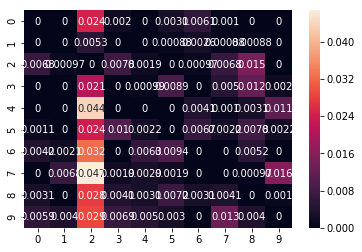

In [29]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.94899999999999995